In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split

In [226]:
df = pd.read_csv('../movieReplicationSet.csv')

In [227]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [228]:
movie_cols = df.columns[0:400]

In [229]:
movie_cols

Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)', 'Black Swan (2010)',
       ...
       'X-Men 2 (2003)', 'The Usual Suspects (1995)', 'The Mask (1994)',
       'Jaws (1975)', 'Harry Potter and the Chamber of Secrets (2002)',
       'Patton (1970)', 'Anaconda (1997)', 'Twister (1996)',
       'MacArthur (1977)', 'Look Who's Talking (1989)'],
      dtype='object', length=400)

In [230]:
sensation_cols = df.columns[400:420]

In [231]:
sensation_cols

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?'],
      dtype='object')

In [232]:
personality_cols = df.columns[420:464]

In [233]:
personality_cols

Index(['Is talkative', 'Tends to find fault with others',
       'Does a thorough job', 'Is depressed/Blue',
       'Is original/comes up with new ideas', 'Is reserved',
       'Is helpful and unselfish with others', 'Can be somewhat careless',
       'Is relaxed/handles stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker', 'Can be tense',
       'Is ingenious/a deep thinker', 'Generates a lot of Enthusiasm',
       'Has a forgiving nature', 'Tends to be disorganized', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable/not easily upset', 'is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic/aesthetic experiences', 'Is sometimes shy/inhibited',
       'Is considerate and kind to al

In [234]:
movie_rating_cols = df.columns[464:474]

In [235]:
movie_rating_cols

Index(['I have cried during a movie',
       'I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')

In [236]:
gender_identity_cols = df.columns[474:475]

In [237]:
gender_identity_cols

Index(['Gender identity (1 = female; 2 = male; 3 = self-described)'], dtype='object')

In [238]:
only_child_cols = df.columns[475:476]

In [239]:
pd.value_counts(df[gender_identity_cols[0]])

Gender identity (1 = female; 2 = male; 3 = self-described)
1.0    807
2.0    260
3.0      6
Name: count, dtype: int64

In [240]:
pd.value_counts(df[only_child_cols[0]])

Are you an only child? (1: Yes; 0: No; -1: Did not respond)
 0    894
 1    177
-1     26
Name: count, dtype: int64

In [241]:
alone_cols = df.columns[476:477]

In [242]:
pd.value_counts(df[alone_cols[0]])

Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
 1    610
 0    462
-1     25
Name: count, dtype: int64

All movies have at least one rating, but this is not the case for all users. Dropping completely empty users.

In [243]:
df_movies = df[movie_cols]
df_movies = df_movies.dropna(how='all', subset=movie_cols)

In [244]:
avg_movie = df_movies.mean(axis = 0)
avg_usr = df_movies.mean(axis = 1)

In [245]:
def fill_na(x):
    movie_avg_val = avg_movie[x.name]
    fill_vals = (avg_usr + movie_avg_val)/2
    return x.fillna(fill_vals)

In [246]:
df_filled = df_movies.apply(fill_na)

# AFYD

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?
2. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?
3. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)
4. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).


### General assumptions for the work:

- The movie ratings can be treated as continuous variables.
- The missing movie ratings can be filled as the arithmetic mean between a user's average rating and a movie's average rating. We are careful not to include the answers of the other questions in this fill.
- For other questions that are not movie ratings, missing questions will be filled with the mode.

# Question 1:

For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that
predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie (and their associated COD values, as well as which movie
ratings are the best predictor, so this table should have 3 columns).

In [247]:
movie_cod = dict()
movie_score = dict()
movie_best_predictor = dict()

for movie in df_filled.columns:
    other_movies = [other_movie for other_movie in df_movies.columns if other_movie != movie]
    best_predictor = None
    best_cod = None
    best_score = np.infty
    for predictor_movie in other_movies:
        X = df_filled[[predictor_movie]].values
        y = df_filled[movie].values.reshape(-1)
        valid_mask = ~np.isnan(y)
        #X = X[valid_mask]
        #y = y[valid_mask]
        reg = LinearRegression().fit(X, y)
        preds = reg.predict(X)
        score = np.sum((y-preds)**2)
        if score < best_score:
            best_predictor = predictor_movie
            best_cod = reg.score(X, y)
            best_score = score
    movie_cod[movie] = best_cod
    movie_score[movie] = best_score
    movie_best_predictor[movie] = best_predictor

For each of the 400 movies, find the movie that predicts ratings the best.

In [248]:
movie_best_predictor

{'The Life of David Gale (2003)': 'The King of Marvin Gardens (1972)',
 'Wing Commander (1999)': 'From Hell (2001)',
 'Django Unchained (2012)': 'The Life of David Gale (2003)',
 'Alien (1979)': 'Aliens (1986)',
 'Indiana Jones and the Last Crusade (1989)': 'Indiana Jones and the Temple of Doom (1984)',
 'Snatch (2000)': 'Slackers (2002)',
 'Rambo: First Blood Part II (1985)': 'Pieces of April (2003)',
 'Fargo (1996)': 'Brazil (1985)',
 'Let the Right One In (2008)': 'Slackers (2002)',
 'Black Swan (2010)': 'Sorority Boys (2002)',
 'King Kong (1976)': 'Unforgiven (1992)',
 'The Machinist (2004)': 'Escape from LA (1996)',
 'A Nightmare on Elm Street (1984)': 'Tropic of Cancer (1970)',
 'Brazil (1985)': 'Change of Habit (1969)',
 'The Fast and the Furious (2001)': 'Terminator 3: Rise of the Machines (2003)',
 'Change of Habit (1969)': 'Cool Hand Luke (1967)',
 'American Beauty (1999)': 'Slackers (2002)',
 'Psycho (1960)': 'What Lies Beneath (2000)',
 'Terminator 3: Rise of the Machines (

Then report the average COD of those 400 simple linear regression models

In [249]:
avg_cod = np.mean(list(movie_cod.values()))
avg_cod

0.42378171067196035

Please include a histogram of these 400 COD values

Text(0, 0.5, 'Count')

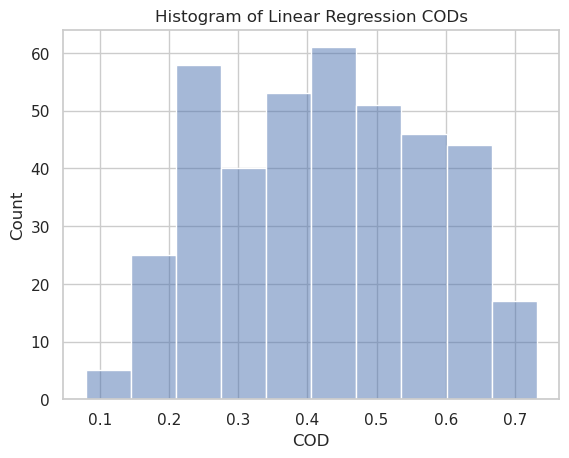

In [250]:
sns.histplot(movie_cod.values(), legend=False)
plt.title('Histogram of Linear Regression CODs')
plt.xlabel('COD')
plt.ylabel('Count')

Table with the 10 movies that are most easily predicted from the ratings of a single other movie, (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [251]:
best_pred_by_single = sorted(movie_score.items(), key=lambda x:np.abs(x[1]))[:10]

In [252]:
best_pred_by_single

[('The Bandit (1996)', 35.18615054788539),
 ('The Lookout (2007)', 35.62352232316842),
 ('The Final Conflict (1981)', 37.217574966386245),
 ('Patton (1970)', 38.27934323711078),
 ('Best Laid Plans (1999)', 38.28727308421355),
 ('Erik the Viking (1989)', 38.80022822095957),
 ('Heavy Traffic (1973)', 39.6785243993204),
 ('FeardotCom (2002)', 39.807228073002136),
 ('I.Q. (1994)', 40.941508369089874),
 ('The Straight Story (1999)', 41.89486485407191)]

In [253]:
pd.DataFrame.from_records([{'Movie':k, 'COD':movie_cod[k], 'Best Predictor Movie':movie_best_predictor[k]} for k,v in best_pred_by_single])

,Movie,COD,Best Predictor Movie
0,The Bandit (1996),0.711222,Best Laid Plans (1999)
1,The Lookout (2007),0.713554,Patton (1970)
2,The Final Conflict (1981),0.700188,The Lookout (2007)
3,Patton (1970),0.713554,The Lookout (2007)
4,Best Laid Plans (1999),0.711222,The Bandit (1996)
5,Erik the Viking (1989),0.731507,I.Q. (1994)
6,Heavy Traffic (1973),0.692734,Ran (1985)
7,FeardotCom (2002),0.691037,The Final Conflict (1981)
8,I.Q. (1994),0.731507,Erik the Viking (1989)
9,The Straight Story (1999),0.700569,Congo (1995)


Table with the 10 movies that are most difficult to predict from the ratings of a single other movie, (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

In [254]:
hardest_pred_by_single = sorted(movie_score.items(), key=lambda x:np.abs(x[1]), reverse=True)[:10]

In [255]:
hardest_pred_by_single

[('Avatar (2009)', 966.6471611871494),
 ('Elf (2003)', 730.818761123938),
 ('The Conjuring (2013)', 677.1215644454422),
 ('Ice Age (2002)', 649.1363576415297),
 ('La La Land (2016)', 638.8797763213186),
 ('Titanic (1997)', 603.3160582562848),
 ('How the Grinch Stole Christmas (2000)', 592.9767008470071),
 ('The Fast and the Furious (2001)', 592.8305915723099),
 ('Cheaper by the Dozen (2003)', 577.2100628937276),
 ('The Cabin in the Woods (2012)', 573.911732395395)]

In [256]:
pd.DataFrame.from_records([{'Movie':k, 'COD':movie_cod[k], 'Best Predictor Movie':movie_best_predictor[k]} for k,v in hardest_pred_by_single])

,Movie,COD,Best Predictor Movie
0,Avatar (2009),0.079485,Bad Boys (1995)
1,Elf (2003),0.198589,The Doom Generation (1995)
2,The Conjuring (2013),0.198474,The Exorcist (1973)
3,Ice Age (2002),0.188296,On Golden Pond (1981)
4,La La Land (2016),0.148514,The Lookout (2007)
5,Titanic (1997),0.154136,Cocktail (1988)
6,How the Grinch Stole Christmas (2000),0.235417,Erik the Viking (1989)
7,The Fast and the Furious (2001),0.168991,Terminator 3: Rise of the Machines (2003)
8,Cheaper by the Dozen (2003),0.233379,Moonraker (1979)
9,The Cabin in the Woods (2012),0.143887,The Evil Dead (1981)


## AFYD for Question 1

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?

    - We chose to only train and evaluate using known targets. That is, not training on filled labels.
    - We chose to evaluate performance using MSE. By easily predicted, we made the choice to mean: With the lowest Mean Squared Error.
    - We dropped all users with no known ratings (that is, that haven't rated even a movie). Just one user in this case.

3. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?

    - In order to model the intended variable and only evaluate for known data, as due to sparsity, the training data would mostly consist of filled target values otherwise.
    - This is the same metric that OLS regression minimizes.
    - Such users are untreatable given the recommendations for the project.

4. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)

    - Best single predictor for each movie.
    - An average COD of 0.378.
    - The histogram.
    - The two tables.
 
6. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).

        - TBD


# Question 2

For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 20 in total), build multiple regression models that include gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addition to the best predicting movie from question 1). Comment on how R^2 has changed relative to the answers in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis.

In [257]:
selected_movies = [x[0] for x in best_pred_by_single + hardest_pred_by_single]

In [258]:
selected_movies

['The Bandit (1996)',
 'The Lookout (2007)',
 'The Final Conflict (1981)',
 'Patton (1970)',
 'Best Laid Plans (1999)',
 'Erik the Viking (1989)',
 'Heavy Traffic (1973)',
 'FeardotCom (2002)',
 'I.Q. (1994)',
 'The Straight Story (1999)',
 'Avatar (2009)',
 'Elf (2003)',
 'The Conjuring (2013)',
 'Ice Age (2002)',
 'La La Land (2016)',
 'Titanic (1997)',
 'How the Grinch Stole Christmas (2000)',
 'The Fast and the Furious (2001)',
 'Cheaper by the Dozen (2003)',
 'The Cabin in the Woods (2012)']

In [259]:
gender_vals = df.loc[df_movies.index][gender_identity_cols[0]].values
sibship_vals = df.loc[df_movies.index][only_child_cols[0]].values
social_vals = df.loc[df_movies.index][alone_cols[0]].values

In [260]:
movie_cod_q2 = dict()

for movie in selected_movies:
    predictor_movie = movie_best_predictor[movie]
    y = df_movies[movie].values.reshape(-1)
    valid_mask = ~np.isnan(y)
    y = y[valid_mask]
    m = df_filled[predictor_movie].values[valid_mask]
    g = gender_vals[valid_mask]
    g[np.isnan(g)] = np.nanmean(g)
    si = sibship_vals[valid_mask]
    si[np.isnan(si)] = np.nanmean(si)
    so = social_vals[valid_mask]
    so[np.isnan(so)] = np.nanmean(so)
    X = np.transpose(np.vstack([m,g,si,so]))
    reg = LinearRegression().fit(X, y)
    movie_cod_q2[movie] = reg.score(X, y)

In [261]:
movie_cod_q2

{'The Bandit (1996)': 0.5759342755209682,
 'The Lookout (2007)': 0.6436746271747724,
 'The Final Conflict (1981)': 0.6254529109360467,
 'Patton (1970)': 0.6067215039388515,
 'Best Laid Plans (1999)': 0.593463083651958,
 'Erik the Viking (1989)': 0.6615390004166636,
 'Heavy Traffic (1973)': 0.6550439761448436,
 'FeardotCom (2002)': 0.575019207374181,
 'I.Q. (1994)': 0.6222431822046737,
 'The Straight Story (1999)': 0.6731186831997225,
 'Avatar (2009)': 0.07684145453688151,
 'Elf (2003)': 0.20363116243298118,
 'The Conjuring (2013)': 0.23128392258566577,
 'Ice Age (2002)': 0.18061743348524784,
 'La La Land (2016)': 0.12924274094047383,
 'Titanic (1997)': 0.15533657162353398,
 'How the Grinch Stole Christmas (2000)': 0.2267383261224425,
 'The Fast and the Furious (2001)': 0.171284409853521,
 'Cheaper by the Dozen (2003)': 0.23252137261446604,
 'The Cabin in the Woods (2012)': 0.13991437570607557}

In [262]:
movie_cod_q1 = {x:movie_cod[x] for x in selected_movies}
movie_cod_q1

{'The Bandit (1996)': 0.7112222468014324,
 'The Lookout (2007)': 0.7135542589926913,
 'The Final Conflict (1981)': 0.7001881161214467,
 'Patton (1970)': 0.7135542589926913,
 'Best Laid Plans (1999)': 0.7112222468014324,
 'Erik the Viking (1989)': 0.731507476731657,
 'Heavy Traffic (1973)': 0.6927335239652475,
 'FeardotCom (2002)': 0.6910371117905774,
 'I.Q. (1994)': 0.731507476731657,
 'The Straight Story (1999)': 0.7005689836445022,
 'Avatar (2009)': 0.07948469093084642,
 'Elf (2003)': 0.19858879359094883,
 'The Conjuring (2013)': 0.19847391483204546,
 'Ice Age (2002)': 0.18829625359866053,
 'La La Land (2016)': 0.14851372649350147,
 'Titanic (1997)': 0.15413567330482125,
 'How the Grinch Stole Christmas (2000)': 0.2354168149199536,
 'The Fast and the Furious (2001)': 0.1689914228239079,
 'Cheaper by the Dozen (2003)': 0.2333794139978912,
 'The Cabin in the Woods (2012)': 0.14388686955485108}

/tmp/ipykernel_23586/2602906927.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


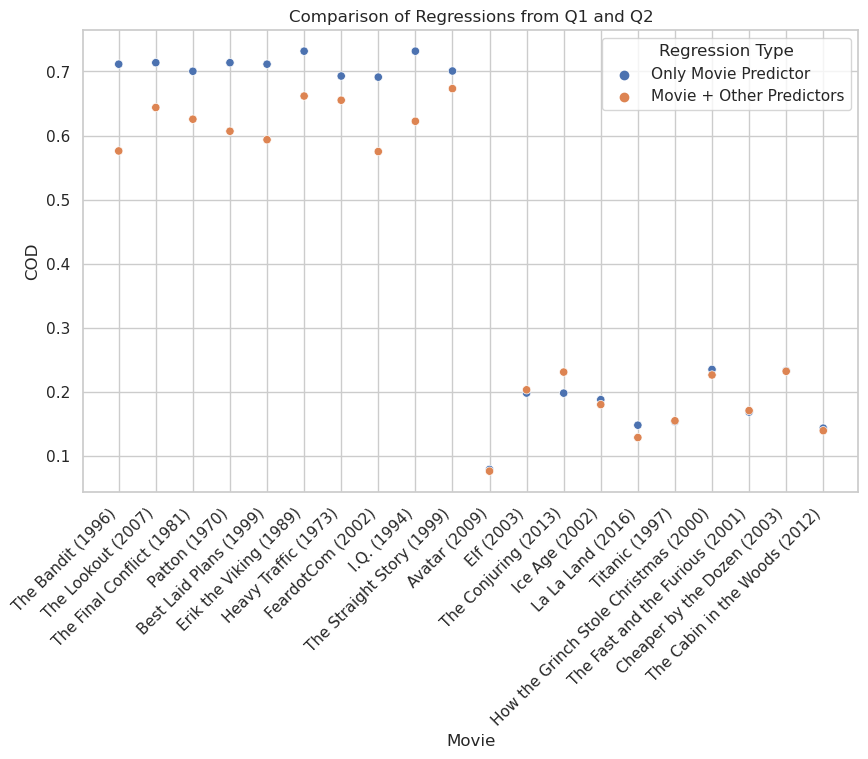

In [263]:
df_q1 = pd.DataFrame(list(movie_cod_q1.items()), columns=['Movie', 'COD'])
df_q2 = pd.DataFrame(list(movie_cod_q2.items()), columns=['Movie', 'COD'])

# Add a 'Source' column to identify the source of data
df_q1['Regression Type'] = 'Only Movie Predictor'
df_q2['Regression Type'] = 'Movie + Other Predictors'

# Concatenate the DataFrames vertically
combined_df = pd.concat([df_q1, df_q2])

# Create the Seaborn plot
sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plot = sns.scatterplot(x="Movie", y="COD", hue="Regression Type", data=combined_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the plot
plt.title("Comparison of Regressions from Q1 and Q2")
plt.xlabel("Movie")
plt.ylabel("COD")
plt.legend(title="Regression Type", loc="upper right")

# Show the plot
# plot COD1 and COD2 on the x and y axis
plt.show()


## AFYD for Question 2

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?

    - We chose to only train and evaluate using known targets. That is, not training on filled labels.
    - We chose to fill unknown answers to gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) with the mean, for the users who had rated each movie.

3. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?

    - In order to model the intended variable and only evaluate for known data, as due to sparsity, the training data would mostly consist of filled target values otherwise.
    - Some users would need to be dropped otherwise. Each non-rating question has a different meaning, and each answer is treated as a continuous variable because we are using OLS. Therefore, the mean should at least allow us to observe the other known variables in the training data for those paired samples.

4. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)

    - Modest COD improvement at best, see plot.
 
6. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).

        - TBD

# Question 3

Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.

In [264]:
movie_codQ3 = deepcopy(movie_cod)
for selected_movie in selected_movies: # Removing movies that have already been used in Question 2(About 20 incl. best and worst predicted movies)
    movie_codQ3.pop(selected_movie, None)

In [265]:
for k,v in movie_codQ3.items():
    print(k, v)

The Life of David Gale (2003) 0.5675329673680644
Wing Commander (1999) 0.5606275642181675
Django Unchained (2012) 0.23233530678010383
Alien (1979) 0.3295479364117798
Indiana Jones and the Last Crusade (1989) 0.3744782737500618
Snatch (2000) 0.45983684517772305
Rambo: First Blood Part II (1985) 0.28911668225139187
Fargo (1996) 0.2867279829015901
Let the Right One In (2008) 0.4406344097244561
Black Swan (2010) 0.11708033979272658
King Kong (1976) 0.21748992290395797
The Machinist (2004) 0.428765958035613
A Nightmare on Elm Street (1984) 0.21174664733151294
Brazil (1985) 0.525606321750943
Change of Habit (1969) 0.5749972440338817
American Beauty (1999) 0.22639811603072124
Psycho (1960) 0.27765221706564913
Terminator 3: Rise of the Machines (2003) 0.30452524220042376
Night of the Living Dead (1968) 0.3935617517507587
Man on Fire (2004) 0.44722999341040504
Star Wars: Episode IV - A New Hope (1977) 0.4727745504679235
The Silence of the Lambs (1991) 0.1723976576053532
The Others (2001) 0.3899

In [266]:
len(movie_codQ3)

380

In [267]:
sortedMovieCod = {movie:cod for movie, cod in sorted(movie_codQ3.items(), key=lambda item: item[1])}
# Sort the dictionary by COD values. 

In [268]:
midCodMovies = dict(list(sortedMovieCod.items())[175:205]) # The total number of movies are 380, this dictionary is sorted as well.
                                        # The 190th movie in this list will have the mean COD value, 
                                        # so 15 movies before and after it will be the middle of our COD range.

In [269]:
len(midCodMovies)

30

In [270]:
midCodMovies

{'Gone in Sixty Seconds (2000)': 0.41102463304683523,
 'Crossroads (2002)': 0.4125064980825913,
 'Austin Powers: The Spy Who Shagged Me (1999)': 0.41411802815118837,
 'Austin Powers in Goldmember (2002)': 0.41411802815118837,
 'Goodfellas (1990)': 0.4161597725339885,
 'The Big Lebowski (1998)': 0.41767373518258677,
 'Twister (1996)': 0.4188687331718818,
 'Blues Brothers 2000 (1998)': 0.4216782524022985,
 'Dances with Wolves (1990)': 0.4235507851172867,
 '28 Days Later (2002)': 0.4238484492347143,
 'Knight and Day (2010)': 0.4268440575456022,
 'The Evil Dead (1981)': 0.42869529140270746,
 'The Machinist (2004)': 0.428765958035613,
 'The Blue Lagoon (1980)': 0.4289149370934736,
 'Uptown Girls (2003)': 0.4289831185912518,
 'Men in Black (1997)': 0.4313587529374374,
 'Men in Black II (2002)': 0.4313587529374374,
 'The Green Mile (1999)': 0.4329819455909021,
 'The Rock (1996)': 0.43839183751048405,
 "You're Next (2011)": 0.4384356044459745,
 'The Poseidon Adventure (1972)': 0.43875895790092

In [271]:
midCodMoviesList = midCodMovies.keys() # removing the middle cod movies from all movies before I choose predictor movies
for midMovie in midCodMoviesList:
    movie_codQ3.pop(midMovie, None)

In [272]:
for k,v in movie_codQ3.items():
    print(k, v)

The Life of David Gale (2003) 0.5675329673680644
Wing Commander (1999) 0.5606275642181675
Django Unchained (2012) 0.23233530678010383
Alien (1979) 0.3295479364117798
Indiana Jones and the Last Crusade (1989) 0.3744782737500618
Snatch (2000) 0.45983684517772305
Rambo: First Blood Part II (1985) 0.28911668225139187
Fargo (1996) 0.2867279829015901
Black Swan (2010) 0.11708033979272658
King Kong (1976) 0.21748992290395797
A Nightmare on Elm Street (1984) 0.21174664733151294
Brazil (1985) 0.525606321750943
Change of Habit (1969) 0.5749972440338817
American Beauty (1999) 0.22639811603072124
Psycho (1960) 0.27765221706564913
Terminator 3: Rise of the Machines (2003) 0.30452524220042376
Night of the Living Dead (1968) 0.3935617517507587
Star Wars: Episode IV - A New Hope (1977) 0.4727745504679235
The Silence of the Lambs (1991) 0.1723976576053532
The Others (2001) 0.38995544324513287
Minority Report (2002) 0.3357214607453455
Sling Blade (1996) 0.5115934334763836
Schindler's List (1993) 0.22818

In [273]:
moviePredictors = ["Django Unchained (2012)", "Indiana Jones and the Last Crusade (1989)", "Terminator 3: Rise of the Machines (2003)",
 "Star Wars: Episode IV - A New Hope (1977)", "The Karate Kid Part II (1986)", "The Godfather: Part II (1974)", "Mission: Impossible II (2000)", "Inglorious Bastards (2009)",
 "Love Story (1970)", "Top Gun (1986)"] # I deliberately chose movies I've seen and somewhat liked

In [274]:
print(list(midCodMoviesList))

['Gone in Sixty Seconds (2000)', 'Crossroads (2002)', 'Austin Powers: The Spy Who Shagged Me (1999)', 'Austin Powers in Goldmember (2002)', 'Goodfellas (1990)', 'The Big Lebowski (1998)', 'Twister (1996)', 'Blues Brothers 2000 (1998)', 'Dances with Wolves (1990)', '28 Days Later (2002)', 'Knight and Day (2010)', 'The Evil Dead (1981)', 'The Machinist (2004)', 'The Blue Lagoon (1980)', 'Uptown Girls (2003)', 'Men in Black (1997)', 'Men in Black II (2002)', 'The Green Mile (1999)', 'The Rock (1996)', "You're Next (2011)", 'The Poseidon Adventure (1972)', 'The Good the Bad and the Ugly (1966)', 'Let the Right One In (2008)', 'Equilibrium (2002)', 'Just Married (2003)', 'The Mummy Returns (2001)', 'The Mummy (1999)', 'Reservoir Dogs (1992)', 'Man on Fire (2004)', 'The Prestige (2006)']


In [275]:
moviesToPredict = df_filled[midCodMoviesList]
moviesAsPredictors = df_filled[moviePredictors]

In [277]:
moviesAsPredictors

,Django Unchained (2012),Indiana Jones and the Last Crusade (1989),Terminator 3: Rise of the Machines (2003),Star Wars: Episode IV - A New Hope (1977),The Karate Kid Part II (1986),The Godfather: Part II (1974),Mission: Impossible II (2000),Inglorious Bastards (2009),Love Story (1970),Top Gun (1986)
0,4.000000,3.000000,2.526834,2.856777,3.500000,2.908521,3.000000,2.899902,2.632491,2.713383
1,1.500000,2.752945,2.519042,2.848984,2.644107,2.900728,2.647321,2.892110,2.624698,2.705590
2,3.234118,3.046716,2.812813,3.142755,2.937878,3.194499,2.941092,3.185881,2.918469,2.999361
3,2.000000,3.000000,2.362722,4.000000,2.487788,2.744409,2.491001,3.500000,2.468379,2.549271
4,3.500000,0.500000,2.288880,2.618823,2.413945,2.670567,2.500000,2.661948,2.394537,2.475429
...,...,...,...,...,...,...,...,...,...,...
1092,3.176711,3.500000,2.755405,4.000000,1.500000,3.137092,3.000000,3.128474,2.861062,2.941954
1093,3.413546,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,3.500000,4.000000,4.000000
1094,3.142976,2.955574,2.721670,3.000000,2.000000,3.103357,2.849949,3.094739,2.827327,2.908219
1095,3.272023,3.084621,2.850718,3.180660,2.975783,3.232404,2.978997,3.223786,2.956374,3.037267


In [278]:
def rms_error(model, X, y):
    """
    Computes mean squared error. Our scoring metric for cross validation
    """
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

In [297]:
X = moviesAsPredictors.values
movieRMSEs = dict()
movieAlphas = dict()
movieWeights = dict()
for movieToPredict in moviesToPredict.columns:
    y = moviesToPredict[movieToPredict]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RidgeCV(alphas=np.logspace(-6, 6, 13)) # This version of Ridge automatically used leave one out validation
    model.fit(X_train, y_train)
    rmseErr = rms_error(model, X_test, y_test)
    movieRMSEs[movieToPredict] = rmseErr
    movieAlphas[movieToPredict] = model.alpha_
    movieWeights[movieToPredict] = model.coef_
    
    
    

In [298]:
for k,v in movieRMSEs.items():
    print(k, v)

Gone in Sixty Seconds (2000) 0.42804230990020053
Crossroads (2002) 0.43472165603564694
Austin Powers: The Spy Who Shagged Me (1999) 0.5316198517451092
Austin Powers in Goldmember (2002) 0.5994768252370315
Goodfellas (1990) 0.3897566743291627
The Big Lebowski (1998) 0.36763532762211154
Twister (1996) 0.38033568062995154
Blues Brothers 2000 (1998) 0.38211514418450226
Dances with Wolves (1990) 0.3736751191468804
28 Days Later (2002) 0.44662048974489116
Knight and Day (2010) 0.3101067079358913
The Evil Dead (1981) 0.3222413854668476
The Machinist (2004) 0.4453583069065036
The Blue Lagoon (1980) 0.3947055261638986
Uptown Girls (2003) 0.4912231824645915
Men in Black (1997) 0.5099528253390176
Men in Black II (2002) 0.5394864783647333
The Green Mile (1999) 0.34906782647730555
The Rock (1996) 0.3084739905308206
You're Next (2011) 0.36575876275932667
The Poseidon Adventure (1972) 0.2798116509944564
The Good the Bad and the Ugly (1966) 0.4111883592689528
Let the Right One In (2008) 0.287959066376

In [306]:
resultsTable = pd.DataFrame(movieRMSEs.items(), columns=["Movies", "RMSE"]).sort_values(by="RMSE", ascending=False).reset_index(drop=True)

In [312]:
resultsTable["Alphas"] = [alpha for alpha in movieAlphas.values()]
resultsTable["Weights"] = [weight for weight in movieWeights.values()]

In [313]:
resultsTable

,Movies,RMSE,Alphas,Weights
0,Austin Powers in Goldmember (2002),0.599477,10.0,"[0.028842428902594433, 0.03212635615023951, 0...."
1,Men in Black II (2002),0.539486,10.0,"[0.09610824743552665, 0.04703953906373887, 0.0..."
2,The Mummy (1999),0.534845,100.0,"[0.05605933913675974, 0.07120547658129397, 0.0..."
3,Austin Powers: The Spy Who Shagged Me (1999),0.531620,100.0,"[0.05513818658494574, 0.08608243404096816, 0.0..."
4,Men in Black (1997),0.509953,100.0,"[0.07802821322061801, 0.04866488836913999, 0.0..."
5,Uptown Girls (2003),0.491223,100.0,"[0.06578421288521374, 0.06230883904753879, 0.0..."
6,The Mummy Returns (2001),0.459232,100.0,"[0.08681658923806056, 0.043647920267577175, 0...."
7,28 Days Later (2002),0.446620,10.0,"[0.08873364349588153, 0.039982652289456855, 0...."
8,The Machinist (2004),0.445358,100.0,"[0.10724122005986987, 0.06379528328643519, 0.0..."
9,Crossroads (2002),0.434722,100.0,"[0.0648542829246391, 0.1219791835652692, 0.047..."


In [301]:
for k,v in movieAlphas.items():
    print(k, v)

Gone in Sixty Seconds (2000) 10.0
Crossroads (2002) 10.0
Austin Powers: The Spy Who Shagged Me (1999) 100.0
Austin Powers in Goldmember (2002) 100.0
Goodfellas (1990) 100.0
The Big Lebowski (1998) 100.0
Twister (1996) 100.0
Blues Brothers 2000 (1998) 10.0
Dances with Wolves (1990) 100.0
28 Days Later (2002) 100.0
Knight and Day (2010) 100.0
The Evil Dead (1981) 100.0
The Machinist (2004) 100.0
The Blue Lagoon (1980) 10.0
Uptown Girls (2003) 100.0
Men in Black (1997) 100.0
Men in Black II (2002) 100.0
The Green Mile (1999) 100.0
The Rock (1996) 10.0
You're Next (2011) 100.0
The Poseidon Adventure (1972) 100.0
The Good the Bad and the Ugly (1966) 100.0
Let the Right One In (2008) 10.0
Equilibrium (2002) 100.0
Just Married (2003) 10.0
The Mummy Returns (2001) 100.0
The Mummy (1999) 100.0
Reservoir Dogs (1992) 100.0
Man on Fire (2004) 100.0
The Prestige (2006) 100.0


In [302]:
for k,v in movieWeights.items():
    print(k, v)

Gone in Sixty Seconds (2000) [ 0.02884243  0.03212636  0.0816308  -0.00192561  0.01981538  0.09814726
  0.05527652  0.06184317  0.32614825  0.14555535]
Crossroads (2002) [ 0.09610825  0.04703954  0.0939653  -0.01498418  0.09048883  0.07205398
  0.01599625 -0.01438152  0.32760288  0.07427067]
Austin Powers: The Spy Who Shagged Me (1999) [0.05605934 0.07120548 0.04259391 0.00374382 0.13804806 0.11139562
 0.07192545 0.11188902 0.1611599  0.1405426 ]
Austin Powers in Goldmember (2002) [0.05513819 0.08608243 0.05049459 0.02901993 0.0547938  0.13265545
 0.08829908 0.08832848 0.13231252 0.12723566]
Goodfellas (1990) [ 0.07802821  0.04866489  0.05269633  0.06493888  0.0337764   0.16467013
 -0.00073976  0.07636208  0.12813189  0.05475587]
The Big Lebowski (1998) [0.06578421 0.06230884 0.01738894 0.05085462 0.03967682 0.14354928
 0.03457313 0.06138763 0.10794933 0.09452552]
Twister (1996) [0.08681659 0.04364792 0.04800745 0.03154001 0.08437358 0.05664082
 0.04719684 0.05014498 0.13208735 0.10844

## AFYD for Question 3

1. **D**: What did you do - what assumptions/choices did you make, if any (e.g. re
independence, type of data, etc.)?

We used regularized regression to predict the ratings of 30 movies given any 10 other movies from the data set. We chose these 10 movies deliberately. When predicting the ratings, we are using the imputed ratings values as targets as well. 
    

3. **Y**: Why did you do this - what was the reasoning for doing this (over all other possible things you could have done)?

Ridge regression helps in cases where your model is overfitting the data by reducing the size of the cofficients and making the model more linear. This is especially necessary since we are training and testing on target values which contain imputed data, so we can't risk our model overfitting on some set values and obsfucating the underlying trend. 
We also deliberately chose the movies we would use as predictors. This was done so we could include at least a couple of movies that are from the same genre as the 30 movies that we are predicting (the decision to include Godfather Part II because Goodfellas (both mafia movies) is one of the 30 movies.


4. **F**: What did you find doing that - at least one number (e.g. a p-value or an effect size), better a number *and* a figure. Context is better – what does the number represent, how was it arrived at (what was the test statistic and degrees of freedom?)


 
6. **A**: Given all of that, how do you answer the question, sth like "Given that my p value is x, I conclude that y]. If you made any questionable assumptions above, this is also where you might want to state limitations to the scope of your answer, if there are any, and you are aware of them. It's fine to have limitations, if you spell them out (e.g. concerns about alpha inflation, independence, distribution of data, etc - if there are any).
